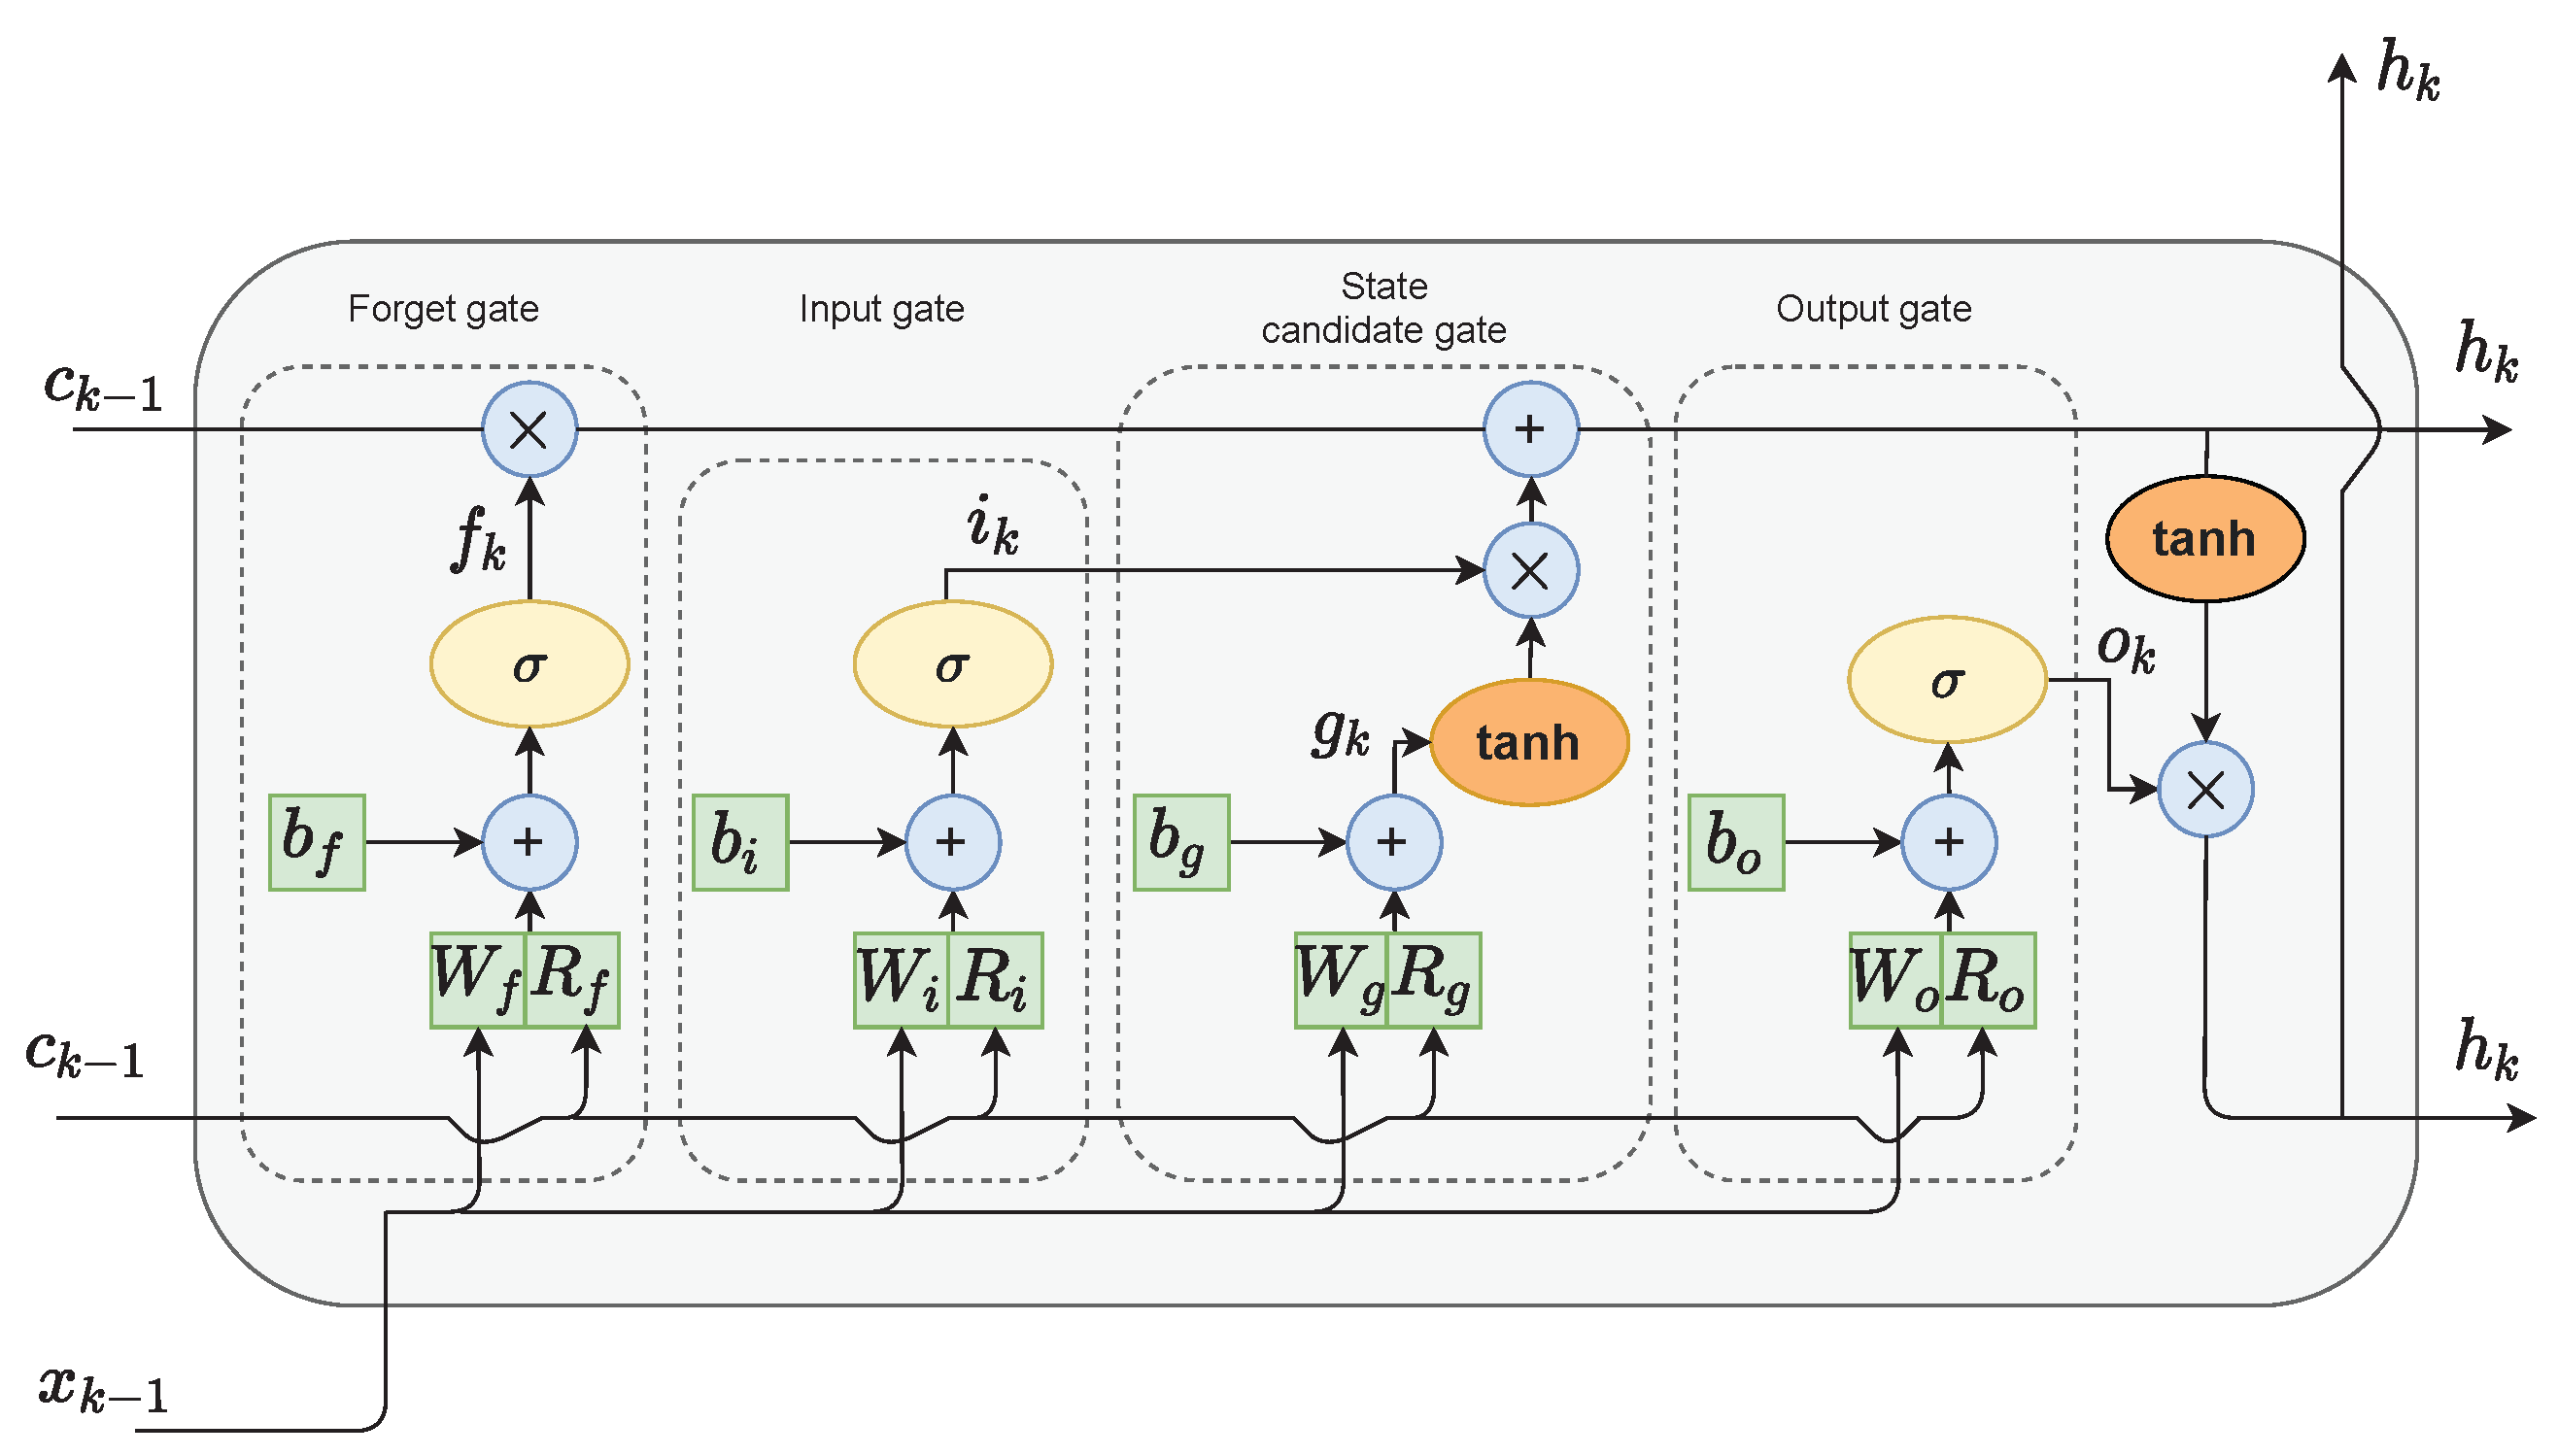


In [1]:
# import torch to create tensors to store all numerical 
#values including raw data and weights and biases
import torch
# then we impprt torch.nn to make weights  and biases part of NN
import torch.nn as nn
# import torch.nn.functional for activation functions
import torch.nn.functional as F
# import optimizer to update weights  and bises
from torch.optim import Adam
# import lightning to make training easier
import lightning as L
# import Dataloader and TensorDataset
from torch.utils.data import TensorDataset,DataLoader


C:\Users\kiran\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# inorder to make training easy inherit from Lighting module
class LSTMbyHand(L.LightningModule):
    # create initialization method for new class
    # this will initialize weight and bias tenors that we need to 
    # implement in LSTM unit
    def __init__(self):
        pass
    # lstm_unit will do lstm math
    def lstm_unit(self,input_value,long_memory,short_memory):
        pass
    # make forward pass through unrolled LSTM
    def forward(self,input):
        pass
    # configure the optimizer which we want to use
    def configure_optimizers(self):
        pass
    # for training purpose
    def training_step(self,batch,batch_idx):
        pass
        
        
        

In [3]:
# inorder to make training easy inherit from Lighting module
class LSTMbyHand(L.LightningModule):
    # create initialization method for new class
    # this will initialize weight and bias tenors that we need to 
    # implement in LSTM unit
    def __init__(self):
        super().__init__()
        mean = torch.tensor(0.0)
        std = torch.tensor(1.0)
        # parameters of 1st block
        self.wlr1 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.wlr2 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.blr1 = nn.Parameter(torch.tensor(0.),requires_grad = True)
        # parameters of 2nd block
        self.wpr1 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.wpr2 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.bpr1 = nn.Parameter(torch.tensor(0.),requires_grad = True)
        # parameters of 3rd block
        self.wp1 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.wp2 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.bp1 = nn.Parameter(torch.tensor(0.),requires_grad = True)
        # parameters of 4th block
        self.wo1 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.wo2 = nn.Parameter(torch.normal(mean = mean , std = std), requires_grad = True)
        self.bo1 = nn.Parameter(torch.tensor(0.),requires_grad = True)
    # lstm_unit will do lstm math
    def lstm_unit(self,input_value,long_memory,short_memory):
        # 1st block
        long_remember_percent = torch.sigmoid((short_memory * self.wlr1)+(input_value *self.wlr2)+self.blr1)
        # 2nd block
        potential_remember_percent = torch.sigmoid((short_memory * self.wpr1)+(input_value * self.wpr2)+ self.bpr1)
        # 3rd block
        potential_memory = torch.tanh((short_memory * self.wp1)+(input_value * self.wp2)+ self.bp1)
        # find the updated long term memory
        updated_long_memory = ((long_memory * long_remember_percent)+(potential_remember_percent * potential_memory))
        # 4th block
        output_percent = torch.sigmoid((short_memory * self.wo1) + (input_value * self.wo2) + self.bo1)
        # 5th block
        updated_short_memory = torch.tanh(updated_long_memory) * output_percent
        return([updated_long_memory,updated_short_memory])

    # make forward pass through unrolled LSTM
    def forward(self,input):
        long_memory = 0
        short_memory = 0
        day1 = input[0]
        day2 = input[1]
        day3 = input[2]
        day4 = input[3]
        long_memory,short_memory = self.lstm_unit(day1,long_memory,short_memory)
        long_memory,short_memory = self.lstm_unit(day2,long_memory,short_memory)
        long_memory,short_memory = self.lstm_unit(day3,long_memory,short_memory)
        long_memory,short_memory = self.lstm_unit(day4,long_memory,short_memory)
        return short_memory
        
    # configure the optimizer which we want to use
    def configure_optimizers(self):
        return Adam(self.parameters())
    # for training purpose
    def training_step(self,batch,batch_idx):
        input_i , label_i = batch
        output_i = self.forward(input_i[0])
        loss = (output_i - label_i)**2
        self.log("train_loss", loss)
        if (label_i == 0):
            self.log("out_0", output_i)
        else:
            self.log("out_1", output_i)
        return loss
    
        
        
        

In [4]:
#super().__init__() : This gives access to modules of parent class.HEre its lightning
# for initilating weights and biases we use normal distribution to randomly intiate each weight
# the random.Normal distribution  has  mean = 0 and SD = 1, thus there is high probability that 
# values near 0 than 1
# hence to do this we use torch.normal(mean = mean , std = std)
# after coding thde LSTM block , start  by long_memory = 0 ,short_memory = 0
# for the forward() method , the input us an array that contsains the first 4 days of 
# stock market values from compny A or company B
# day1 = input[0], day2 = input[1], day3 = input[2], day4 = input[3]
# when we call log() method , which is part of Lightning module that we are inherting from 
# then lightning will creatw a new file in a directory called lightning_logs
# are store whatever we want to keep track of in it
# in this case , we are storing the loss using the label train_loss


In [5]:
model = LSTMbyHand()

In [9]:
# For company A , observed = 0  ,predicted = ?
print('For company A , observed = 0  ,predicted = ',model(torch.tensor([0,0.5,0.25,1])).detach())

For company A , observed = 0  ,predicted =  tensor(0.1306)


In [8]:
# we can see that prediction for company A is0.1306 , which is relatively close to 0

In [10]:
# For company B , observed = 1  ,predicted = ?
print('For company B , observed = 1  ,predicted = ',model(torch.tensor([1,0.5,0.25,1])).detach())

For company B , observed = 1  ,predicted =  tensor(0.1484)


In [11]:
# we can see that prediction for company B is0.1484 , which is far from 1

In [16]:
# Now we pass the sample data  along with its labels 

inputs = torch.tensor([[0,0.5,0.25,1],[1,0.5,0.25,1]])
labels = torch.tensor([0,1])
# Now we combine the inputs and ;labels into the tensot data set called dataset
dataset = TensorDataset(inputs,labels)
dataloader = DataLoader(dataset)
# we start by creating a ligthtning trainer and tell it to train ita= 
# atmost 2000 epochs
trainer = L.Trainer(max_epochs = 2000)
trainer.fit(model,train_dataloaders=dataloader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: C:\Users\kiran\lightning_logs

  | Name | Type | Params
------------------------------
------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
C:\Users\kiran\anaconda3\lib\site-packages\lightning\pytorch\trainer\trainer.py:1609: PossibleUserWarning: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2000` reached.


In [17]:
# For company A , observed = 0  ,predicted = ?
print('For company A , observed = 0  ,predicted = ',model(torch.tensor([0,0.5,0.25,1])).detach())

For company A , observed = 0  ,predicted =  tensor(0.0018)


In [18]:
# For company B , observed = 1  ,predicted = ?
print('For company B , observed = 1  ,predicted = ',model(torch.tensor([1,0.5,0.25,1])).detach())

For company B , observed = 1  ,predicted =  tensor(0.9169)


In [19]:
#Run the following command in anaconda propt to get the visualiation of tensor board python -m tensorboard.main --logdir=logs/

#paste the link in windows browser ##http://localhost:6006/

In [22]:
# The best thing about lightning is that it allowa us to start from the point where the trainng is stopped .
# in short no need to start over again
# checkpoint_callback.best_model_path = most recent check point


In [21]:
path_to_best_checkpoint = trainer.checkpoint_callback.best_model_path

In [24]:
trainer= L.Trainer(max_epochs = 3000)
trainer.fit(model,train_dataloaders = dataloader,ckpt_path = path_to_best_checkpoint)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at C:\Users\kiran\lightning_logs\version_0\checkpoints\epoch=1999-step=4000.ckpt
C:\Users\kiran\anaconda3\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:338: UserWarning: The dirpath has changed from 'C:\\Users\\kiran\\lightning_logs\\version_0\\checkpoints' to 'C:\\Users\\kiran\\lightning_logs\\version_1\\checkpoints', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
  warnings.warn(

  | Name | Type | Params
------------------------------
------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
Restored all states from the checkpoint file at C:\Users\kiran\lightnin

Training: 2it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=3000` reached.


In [25]:
# For company A , observed = 0  ,predicted = ?
print('For company A , observed = 0  ,predicted = ',model(torch.tensor([0,0.5,0.25,1])).detach())

For company A , observed = 0  ,predicted =  tensor(0.0003)


In [26]:
# For company B , observed = 1  ,predicted = ?
print('For company B , observed = 1  ,predicted = ',model(torch.tensor([1,0.5,0.25,1])).detach())

For company B , observed = 1  ,predicted =  tensor(0.9573)


In [27]:
path_to_best_checkpoint = trainer.checkpoint_callback.best_model_path
trainer= L.Trainer(max_epochs = 5000)
trainer.fit(model,train_dataloaders = dataloader,ckpt_path = path_to_best_checkpoint)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at C:\Users\kiran\lightning_logs\version_1\checkpoints\epoch=2999-step=6000.ckpt
C:\Users\kiran\anaconda3\lib\site-packages\lightning\pytorch\callbacks\model_checkpoint.py:338: UserWarning: The dirpath has changed from 'C:\\Users\\kiran\\lightning_logs\\version_1\\checkpoints' to 'C:\\Users\\kiran\\lightning_logs\\version_2\\checkpoints', therefore `best_model_score`, `kth_best_model_path`, `kth_value`, `last_model_path` and `best_k_models` won't be reloaded. Only `best_model_path` will be reloaded.
  warnings.warn(

  | Name | Type | Params
------------------------------
------------------------------
12        Trainable params
0         Non-trainable params
12        Total params
0.000     Total estimated model params size (MB)
Restored all states from the checkpoint file at C:\Users\kiran\lightnin

Training: 2it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5000` reached.


In [28]:
# For company A , observed = 0  ,predicted = ?
print('For company A , observed = 0  ,predicted = ',model(torch.tensor([0,0.5,0.25,1])).detach())

For company A , observed = 0  ,predicted =  tensor(2.9749e-05)


In [29]:
# For company B , observed = 1  ,predicted = ?
print('For company B , observed = 1  ,predicted = ',model(torch.tensor([1,0.5,0.25,1])).detach())

For company B , observed = 1  ,predicted =  tensor(0.9844)
